In [2]:
# Importing libraries
import pandas as pd
import numpy as np

# Load datasets
movies_df = pd.read_csv("Movies.csv")
ratings_df = pd.read_csv("Ratings.csv")

# Display the first few rows of each dataset to understand its structure
print("Movies dataset:")
movies_df.head()



Movies dataset:


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10329 entries, 0 to 10328
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  10329 non-null  int64 
 1   title    10329 non-null  object
 2   genres   10329 non-null  object
dtypes: int64(1), object(2)
memory usage: 242.2+ KB


In [3]:
movies_df.describe()

,movieId
count,10329.000000
mean,31924.282893
std,37734.741149
min,1.000000
25%,3240.000000
50%,7088.000000
75%,59900.000000
max,149532.000000


In [4]:
print("\nRatings dataset:")
ratings_df.head()


Ratings dataset:


,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [5]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105339 entries, 0 to 105338
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     105339 non-null  int64  
 1   movieId    105339 non-null  int64  
 2   rating     105339 non-null  float64
 3   timestamp  105339 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.2 MB


In [6]:
ratings_df.describe()

,userId,movieId,rating,timestamp
count,105339.000000,105339.000000,105339.000000,1.053390e+05
mean,364.924539,13381.312477,3.516850,1.130424e+09
std,197.486905,26170.456869,1.044872,1.802660e+08
min,1.000000,1.000000,0.500000,8.285650e+08
25%,192.000000,1073.000000,3.000000,9.711008e+08
50%,383.000000,2497.000000,3.500000,1.115154e+09
75%,557.000000,5991.000000,4.000000,1.275496e+09
max,668.000000,149532.000000,5.000000,1.452405e+09


In [7]:
# 2. Finding unique users and movies
unique_users = ratings_df['userId'].nunique()
unique_movies = ratings_df['movieId'].nunique()
print("\nNumber of unique users:", unique_users)
print("Number of unique movies:", unique_movies)

# 3. Average rating and total movies at genre level
genre_ratings = movies_df['genres'].str.split('|', expand=True).stack().value_counts()
print("\nAverage rating and total movies at genre level:")
print(genre_ratings)

# 4. Unique genres considered
unique_genres = movies_df['genres'].nunique()
print("\nNumber of unique genres considered:", unique_genres)


Number of unique users: 668
Number of unique movies: 10325

Average rating and total movies at genre level:
Drama                 5220
Comedy                3515
Thriller              2187
Romance               1788
Action                1737
Crime                 1440
Adventure             1164
Horror                1001
Sci-Fi                 860
Mystery                675
Fantasy                670
Children               540
War                    503
Documentary            415
Musical                409
Animation              401
Western                235
Film-Noir              195
IMAX                   152
(no genres listed)       7
Name: count, dtype: int64

Number of unique genres considered: 938


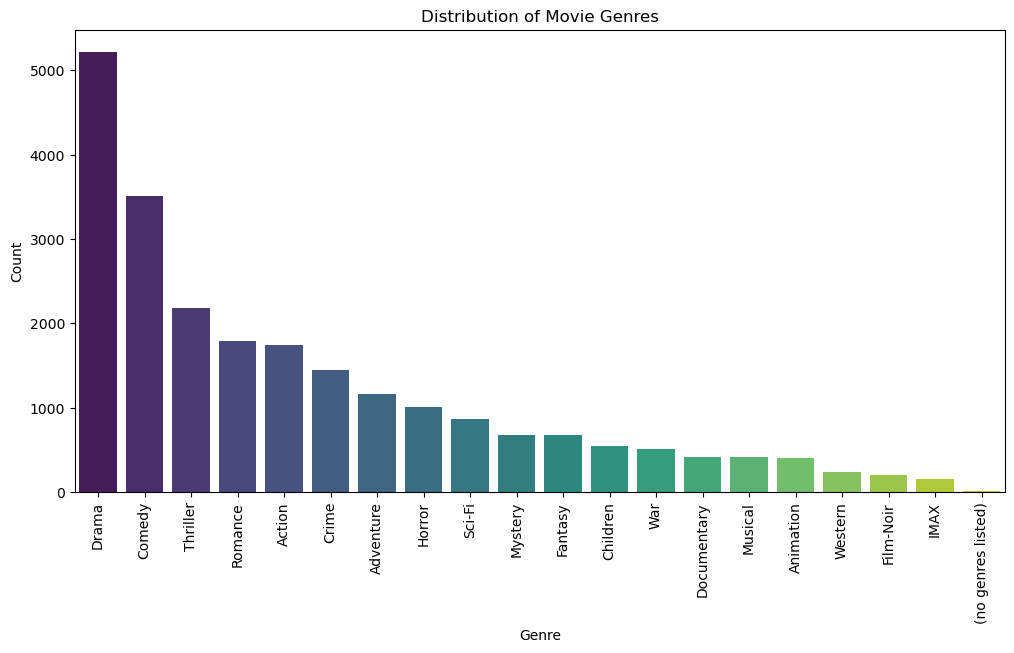

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert genre_ratings to a DataFrame for plotting
genre_ratings_df = genre_ratings.to_frame().reset_index()
genre_ratings_df.columns = ['Genre', 'Count']

# Plotting the distribution of movie genres
plt.figure(figsize=(12, 6))
sns.barplot(x='Genre', y='Count', data=genre_ratings_df, palette='viridis')
plt.title('Distribution of Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


In [8]:
# Objective one: implementation solution
def popularity_based_recommender(genre, min_reviews_threshold, num_recommendations):
    # Filter movies by genre
    genre_movies = movies_df[movies_df['genres'].str.contains(genre)]
    
    # Check if any movies match the specified genre
    if genre_movies.empty:
        print("No movies found for the specified genre.", genre)
        return None

    # Filter movies by minimum reviews threshold
    genre_movies = genre_movies.merge(ratings_df.groupby('movieId')['rating'].count().reset_index(name='num_reviews'),
                                      on='movieId', how='inner')
    genre_movies = genre_movies[genre_movies['num_reviews'] >= min_reviews_threshold]

    # Check if there are any movies left after applying the minimum reviews threshold
    if genre_movies.empty:
        print("No movies found with the specified minimum reviews threshold.")
        return None

    # Calculate popularity based on average rating
    popularity_df = ratings_df.merge(genre_movies, on='movieId', how='inner')
    popularity_df = popularity_df.groupby('title').agg({'rating': 'mean', 'num_reviews': 'count'}).reset_index()
    popularity_df = popularity_df.rename(columns={'rating': 'AverageMovieRating', 'num_reviews': 'NumReviews'})

    # Sort by average rating in descending order
    popularity_df = popularity_df.sort_values(by='AverageMovieRating', ascending=False)

    # Recommend top N movies
    top_recommendations = popularity_df.head(num_recommendations)

    return top_recommendations

# Accept user input for genre, minimum reviews threshold, and number of recommendations
genre = input("Enter genre: ")
min_reviews_threshold = int(input("Enter minimum reviews threshold: "))
num_recommendations = int(input("Enter number of recommendations: "))

# Generate recommendations based on user input
recommendations = popularity_based_recommender(genre, min_reviews_threshold, num_recommendations)
if recommendations is not None:
    print(recommendations)



Enter genre: Comedy
Enter minimum reviews threshold: 100
Enter number of recommendations: 5
                                     title  AverageMovieRating  NumReviews
34  Monty Python and the Holy Grail (1975)            4.301948         154
18                            Fargo (1996)            4.271144         201
39              Princess Bride, The (1987)            4.163743         171
40                     Pulp Fiction (1994)            4.160000         325
23                     Forrest Gump (1994)            4.138264         311


In [ ]:
# Objective two: implementation solution
def content_based_recommender(movie_title, num_recommendations):
    # Find genres of the input movie
    input_movie = movies_df[movies_df['title'].str.contains(movie_title)]
    
    # Check if input movie exists
    if input_movie.empty:
        print(movie_title, " Movie is not found.")
        return None
    
    input_genres = input_movie['genres'].iloc[0]
    
    print("input_genres", input_genres);

    # Filter movies with similar genres
    similar_movies = movies_df[movies_df['genres'].str.contains(input_genres) & (movies_df['title'] != movie_title)]

    # Recommend top N movies
    top_recommendations = similar_movies.head(num_recommendations)

    return top_recommendations



# Example usage
movie_title = input("Enter movie title: ")
num_recommendations = int(input("Enter number of recommendations: "))

recommendations = content_based_recommender(movie_title, num_recommendations)
if recommendations is not None:
    print(recommendations[['title']])


In [14]:
# Objective one: implementation solution
def collaborative_recommender(user_id, num_recommendations, k):
    # Filter ratings by the target user ID
    user_ratings = ratings_df[ratings_df['userId'] == user_id]

    # Check if the target user exists in the dataset
    if user_ratings.empty:
        print("User with id ", user_id ," is not found.")
        return None

    # Calculate similarity between the target user and all other users
    user_similarity = {}
    for other_user_id, other_user_ratings in ratings_df.groupby('userId'):
        # Check if the other user has rated any movies that the target user has also rated
        common_movies = set(user_ratings['movieId']).intersection(set(other_user_ratings['movieId']))
        if len(common_movies) > 0:
            # Calculate the correlation coefficient only for common movies
            correlation = np.corrcoef(user_ratings[user_ratings['movieId'].isin(common_movies)]['rating'],
                                       other_user_ratings[other_user_ratings['movieId'].isin(common_movies)]['rating'])[0, 1]
            user_similarity[other_user_id] = correlation

    # Check if there are any similar users
    if len(user_similarity) == 0:
        print("No similar users found.")
        return None

    # Identify K most similar users
    similar_users = pd.Series(user_similarity).nlargest(k+1)  # Exclude the target user from similar users

    # Aggregate ratings of similar users for each movie
    similar_user_ratings = ratings_df[ratings_df['userId'].isin(similar_users.index)]
    aggregated_ratings = similar_user_ratings.groupby('movieId')['rating'].mean().reset_index()

    # Exclude movies already rated by the target user
    aggregated_ratings = aggregated_ratings[~aggregated_ratings['movieId'].isin(user_ratings['movieId'])]

    # Sort by aggregated ratings in descending order
    aggregated_ratings = aggregated_ratings.sort_values(by='rating', ascending=False)

    # Recommend top N movies
    top_recommendations = aggregated_ratings.merge(movies_df, on='movieId').head(num_recommendations)

    return top_recommendations[['title']]

# Example usage
user_id = int(input("Enter user ID: "))
num_recommendations = int(input("Enter number of recommendations: "))
k = int(input("Enter threshold for similar users (k): "))

recommendations = collaborative_recommender(user_id, num_recommendations, k)
if recommendations is not None:
    print(recommendations)


Enter user ID: 1
Enter number of recommendations: 10
Enter threshold for similar users (k): 3


C:\Users\AmosAniwange\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
C:\Users\AmosAniwange\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
C:\Users\AmosAniwange\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
C:\Users\AmosAniwange\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\AmosAniwange\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


                                               title
0                                  Abyss, The (1989)
1  Dr. Strangelove or: How I Learned to Stop Worr...
2         Star Trek III: The Search for Spock (1984)
3                              Big Sleep, The (1946)
4                                      Tarzan (1999)
5                               Almost Famous (2000)
6                               Thin Man, The (1934)
7                      Affair to Remember, An (1957)
8                         Catch Me If You Can (2002)
9                                 Rear Window (1954)
